**Librerias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 

**Cargar DatasetProcesado**

In [2]:
df_ohe = pd.read_csv('data-Clean.csv')
df_ohe.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,0,0.986,0.313,490867,0.23100,0.000431,0.0964,-14.287,0.0547,86.001,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.972,0.360,176797,0.20100,0.028000,0.1330,-19.794,0.0581,131.798,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.935,0.168,266184,0.47000,0.020400,0.3630,-8.415,0.0383,75.126,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.961,0.250,288573,0.00605,0.000000,0.1200,-33.440,0.0480,76.493,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.985,0.142,629760,0.05800,0.146000,0.0969,-23.625,0.0493,172.935,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Hallar X,Y**

In [3]:
#Se dividen los datos en conjuntos de entrenamiento y prueba para poder medir el rendimiento
y=df_ohe['popularity']
X=df_ohe.drop('popularity',axis=1)

**Dividir traning and testing**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Normalización**

Uno de los más recomendado para reducir reducir los efectos de los valores atípicos, en relación con MinMaxScaler.

In [5]:
sc = RobustScaler()
# transformar los conjuntos de entrenamiento y prueba
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
print("Datos escalados \n", X_train_scaled)
print("Datos escalados \n", X_test_scaled )

Datos escalados 
 [[-0.26219049 -0.98809524  0.40363424 ...  0.          0.
   0.        ]
 [ 1.01473492 -0.03968254 -0.01896012 ...  0.          0.
   0.        ]
 [-0.23499924  0.49603175 -0.06293742 ...  0.          0.
   0.        ]
 ...
 [-0.28269786 -0.04761905 -0.46522281 ...  0.          0.
   0.        ]
 [-0.26370955  0.43253968  1.01977451 ...  0.          0.
   0.        ]
 [ 0.85371411 -0.1547619   0.10943425 ...  0.          0.
   0.        ]]
Datos escalados 
 [[-0.06683883 -0.22222222 -0.75687782 ...  0.          0.
   0.        ]
 [ 0.80510406 -0.32142857  0.77147329 ...  0.          0.
   0.        ]
 [ 0.40407109 -0.17857143 -0.06153768 ...  0.          0.
   0.        ]
 ...
 [ 0.65775482  0.19047619  0.00374112 ...  0.          0.
   0.        ]
 [-0.30346347  0.28968254 -0.12757998 ...  0.          0.
   0.        ]
 [ 1.11955036 -0.37698413  0.4092332  ...  0.          0.
   0.        ]]


## Modelo Random Forest

Modelo Inicial

In [7]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
pred = clf_rf.predict(X_test) 

# print prediction results
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     51306
           1       0.77      0.62      0.69     17142

    accuracy                           0.86     68448
   macro avg       0.83      0.78      0.80     68448
weighted avg       0.85      0.86      0.85     68448



**Hyperparameter Tuning**

In [8]:
clf_rf_tuned = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, 
                                      min_samples_leaf=2, class_weight='balanced', 
                                      random_state=42)
clf_rf_tuned.fit(X_train, y_train)

pred = clf_rf_tuned.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     51306
           1       0.75      0.77      0.76     17142

    accuracy                           0.88     68448
   macro avg       0.84      0.84      0.84     68448
weighted avg       0.88      0.88      0.88     68448



Ajustar los hiperparámetros del modelo mejoró la puntuación del acuracy para predecir canciones populares en un 2 %

**Métricas**

In [9]:
def Metricas(y_test, pred):
    print()
    print('Métricas de rendimiento')
    print()
    print("Precision:", metrics.precision_score(y_test, pred))
    print("Recall:", metrics.recall_score(y_test, pred))
    print("AUC:", roc_auc_score(y_test, pred))

In [10]:
Metricas(y_test, pred)


Métricas de rendimiento

Precision: 0.7531946593318435
Recall: 0.7667716719169292
AUC: 0.8414121876522235


**Cross Validation**

Utilizar la validación cruzada K Fold para medir la precisión de nuestro modelo RF

In [11]:
#Cross-Validation
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
cross_val_score(RandomForestClassifier(criterion='entropy', random_state=1, n_jobs=-1), X, y, cv=cv)

array([0.86865942, 0.86794355, 0.86800199, 0.86925842, 0.87022265])

Se puede observar que en 5 iteraciones obtenemos una puntuación de aproximadamente del 86% todo el tiempo. 

**Features Importace**

Se observa la importancia de las características del modelo y verificar en que atributos se basaron

In [12]:
#acceder a los valores de importancia de las características del modelo de bosque aleatorio ajustado y ordenarlos
rf_importances_df = pd.Series(clf_rf_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
#analizar la serie en un marco de datos
rf_importances_df = rf_importances_df.reset_index()
rf_importances_df.columns = ['Atributo', 'Importancia']
rf_importances_df

,Atributo,Importancia
0,loudness,0.085371
1,genre_Pop,0.070061
2,acousticness,0.069994
3,speechiness,0.064803
4,energy,0.064672
5,danceability,0.062689
6,duration_ms,0.058774
7,instrumentalness,0.058654
8,valence,0.057262
9,liveness,0.056878


Gráfico de las carácteristicas más relevantes

<BarContainer object of 55 artists>

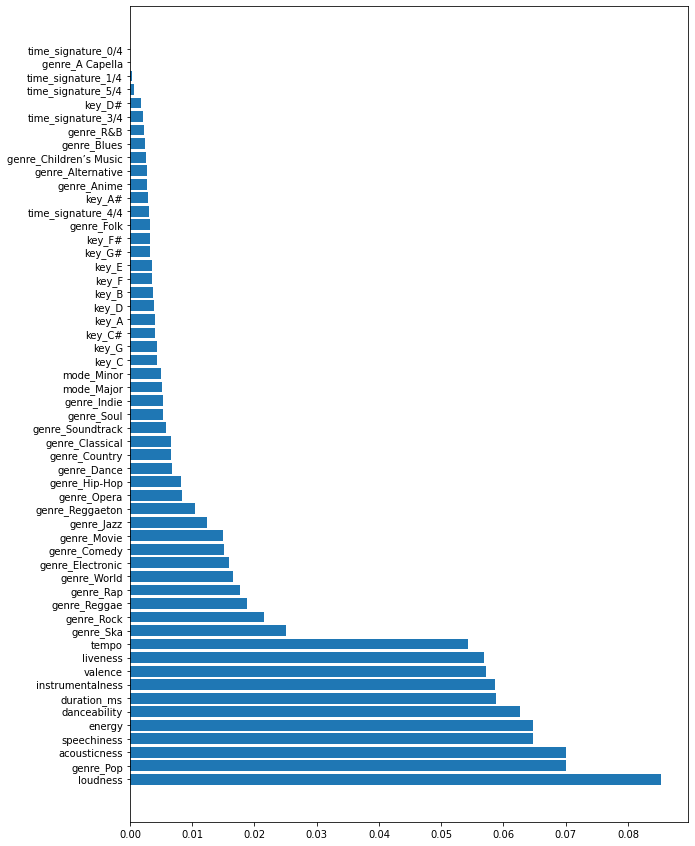

In [13]:
rf_importances_df = pd.Series(clf_rf_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
#parsing the series to a dataframe
rf_importances_df = rf_importances_df.reset_index()
rf_importances_df.columns = ['Atributo', 'Importancia']

fig, ax = plt.subplots(figsize=(10,15))
ax.barh(rf_importances_df['Atributo'], rf_importances_df['Importancia'])

Se observa que ciertas características como 'loudness', 'gnre_pop' y 'acusticness' afectaron positivamente la predicción, otras características como 'time_signature_04', 'gnre_Acapella' y 'time_signature_05' la afectaron negativamente.

Text(0.5, 1.0, 'Feature Importances: Random Forest')

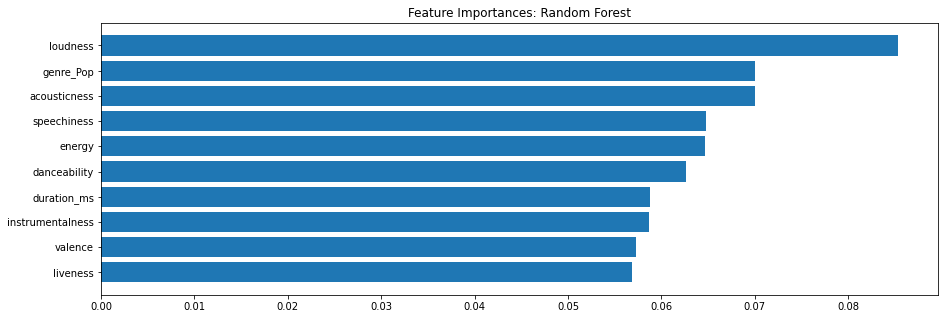

In [14]:
#trazando la importancia de las características 

fig, ax = plt.subplots(figsize=(15,5))

rf_importances_df = rf_importances_df.sort_values(by='Importancia', ascending=True).tail(10)
ax.barh(rf_importances_df['Atributo'], rf_importances_df['Importancia'])
ax.set_title('Feature Importances: Random Forest')


**Recuento de ocurrencias de Géneros de música populares**

In [15]:
popular_gnre = df_ohe[df_ohe['popularity'] == 1]
#unpopular_gnre = df_ohe[df_ohe['popularity']==0]

In [16]:
#verificar el recuento de ocurrencias de género para canciones populares
popular_gnre = popular_gnre.iloc[:, 11:36].agg('sum').sort_values(ascending=False).reset_index()
popular_gnre.columns = ['genre', 'count']
popular_gnre

,genre,count
0,genre_Pop,9052.0
1,genre_Rap,5915.0
2,genre_Rock,5887.0
3,genre_Hip-Hop,4891.0
4,genre_Dance,4418.0
5,genre_Indie,3538.0
6,genre_Children’s Music,3405.0
7,genre_Alternative,3405.0
8,genre_Blues,3405.0
9,genre_Anime,3405.0


## Modelo Regresión Logistica

Modelo ajustado con los hiperparametros

In [17]:
clf_logreg = LogisticRegressionCV(cv=5, class_weight='balanced', Cs=1, 
                                          penalty='l2', solver='liblinear',
                                          random_state=42)
clf_logreg.fit(X_train,  y_train)
pred = clf_logreg.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67     51306
           1       0.35      0.71      0.46     17142

    accuracy                           0.59     68448
   macro avg       0.60      0.63      0.57     68448
weighted avg       0.72      0.59      0.62     68448



**Métricas**

In [18]:
Metricas(y_test, pred)


Métricas de rendimiento

Precision: 0.34518156226007335
Recall: 0.7081437405203593
AUC: 0.6296536735580396


## Modelo XGBoost

In [19]:
clf_xgb = XGBClassifier(learning_rate=0.1, max_depth=10, 
                              random_state=42)
clf_xgb.fit(X_train, y_train)
pred = clf_xgb.predict(X_test)
print(classification_report(y_test, pred))

C:\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     51306
           1       0.73      0.50      0.60     17142

    accuracy                           0.83     68448
   macro avg       0.79      0.72      0.74     68448
weighted avg       0.82      0.83      0.82     68448



**Métricas**

In [20]:
Metricas(y_test, pred)


Métricas de rendimiento

Precision: 0.7327009401202677
Recall: 0.5046669000116673
AUC: 0.7215768133551494
